In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal
from scipy.optimize import brentq
from matplotlib.ticker import FixedFormatter
from functions import quantizer, amplitude_sampler

import filters_func 

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
plt.rcParams["figure.figsize"] = (10,4)

#### Test functions

In [3]:
# Sinusoidal with frequency in Harmony
def test_func(x):
    f0 = 1.2 # Hz
    return 0.3 * np.sin(2 * np.pi * f0 * x) + 0.5 * np.sin(2 * np.pi * 2 * f0 * x) 

In [4]:
# Sawtooth signal
'''
def test_func(x):
    f0 = 2.5 # Hz
    return 0.3 * signal.sawtooth(2 * np.pi * f0 * x, 0.6)
'''

'\ndef test_func(x):\n    f0 = 2.5 # Hz\n    return 0.3 * signal.sawtooth(2 * np.pi * f0 * x, 0.6)\n'

In [ ]:
# Piecewise linear

#### Signal generation

In [70]:
# Continuous signal
stop_time = 1
x = np.linspace(0, stop_time, 1000) #time vector
y = test_func(x)

# Sampled signal
x_smp = x[::10]
y_smp = y[::10]


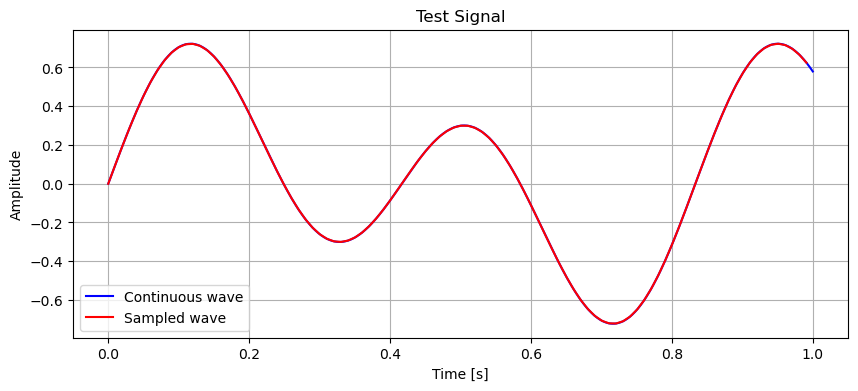

In [71]:
plt.plot(x, y,  'b', label= 'Continuous wave')
plt.plot(x_smp, y_smp,'r', label= 'Sampled wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Test Signal')
plt.legend()
plt.grid()

#### Quantization

In [74]:
from functions import quantizer
q = quantizer(5)
step = q.step

Text(0.5, 1.0, 'Quantization of continuous signal')

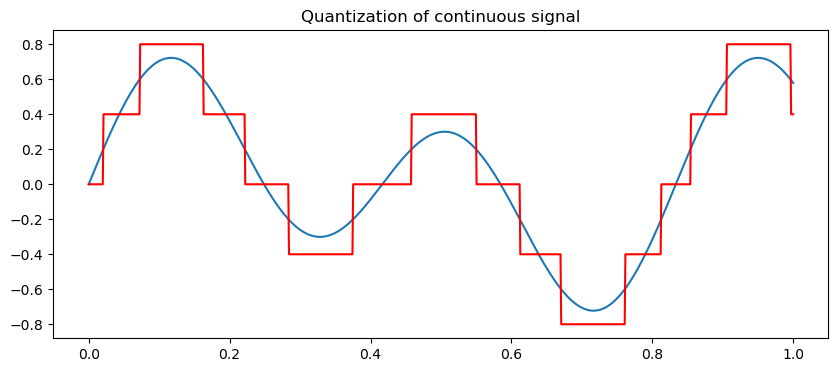

In [80]:
# quantization continuous signal
plt.plot(x, y)
plt.plot(x, q.quantize(y),'r');
plt.title("Quantization of continuous signal")

Text(0.5, 1.0, 'Quantization of sampled signal')

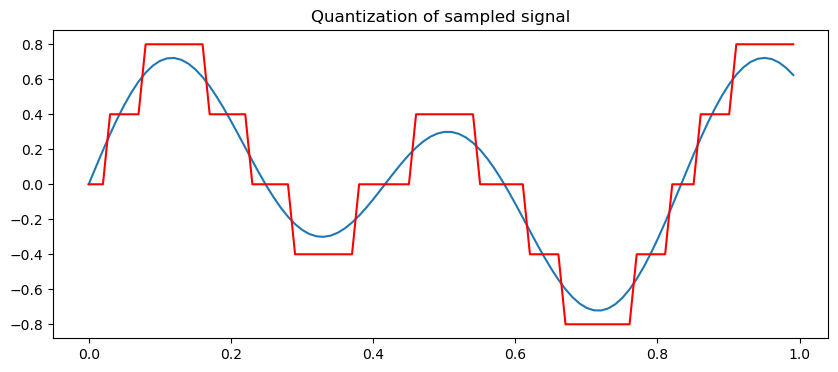

In [81]:
# quantization continuous signal
plt.plot(x_smp, y_smp)
plt.plot(x_smp, q.quantize(y_smp),'r')
plt.title("Quantization of sampled signal")

Transition instants: [0.         0.02068039 0.07249751 0.16269324 0.22148681 0.28353382
 0.37530005 0.45803329 0.54979951 0.61184652 0.67064009 0.76083582
 0.81265294 0.85401373 0.90583085 0.99602657]
Bins index: [2 3 4 3 2 1 2 3 2 1 0 1 2 3 4 3]
Quantization values: [ 0.   0.4  0.8  0.4  0.  -0.4  0.   0.4  0.  -0.4 -0.8 -0.4  0.   0.4
  0.8  0.4]


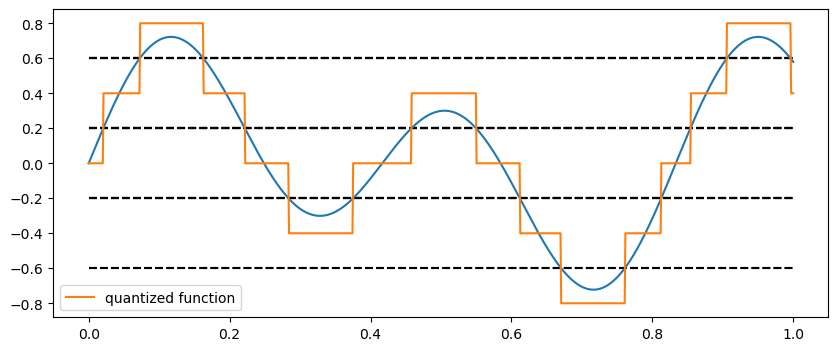

In [99]:
T = int(stop_time)

# transitions and bins
t, q_idx = amplitude_sampler(test_func, T, q)

# bins to quantization values
a = q.qvalue(q_idx)  #--> find the step y value for each bin 

print('Transition instants: {}'.format(t))
print('Bins index: {}'.format(q_idx))
print('Quantization values: {}'.format(a))

for i in range(0,len(q_idx)-1): 
    plt.hlines(q.qthreshold(q_idx[i],q_idx[i+1]), 0, 1,'black', linestyles='dashed', label='')

plt.plot(x, test_func(x));
plt.plot(x, q.quantize(test_func(x)), label='quantized function')
plt.legend()

Transition instants: [0.         0.02068039 0.07249751 0.16269324 0.22148681 0.28353382
 0.37530005 0.45803329 0.54979951 0.61184652 0.67064009 0.76083582
 0.81265294 0.85401373 0.90583085 0.99602657]
Bins index: [2 3 4 3 2 1 2 3 2 1 0 1 2 3 4 3]
Quantization values: [ 0.   0.4  0.8  0.4  0.  -0.4  0.   0.4  0.  -0.4 -0.8 -0.4  0.   0.4
  0.8  0.4]


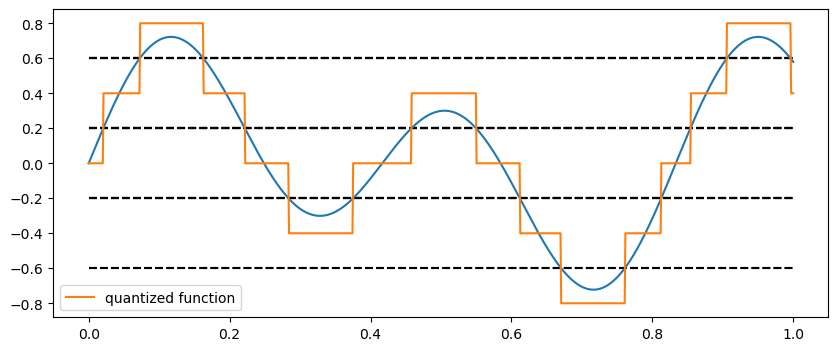

In [82]:
T = int(stop_time)

# transitions and bins
t, q_idx = amplitude_sampler(test_func, T, q)

# bins to quantization values
a = q.qvalue(q_idx)  #--> find the step y value for each bin

print('Transition instants: {}'.format(t))
print('Bins index: {}'.format(q_idx))
print('Quantization values: {}'.format(a))

for i in range(0,len(q_idx)-1):
    plt.hlines(q.qthreshold(q_idx[i],q_idx[i+1]), 0, 1,'black', linestyles='dashed', label='')

plt.plot(x, test_func(x));
plt.plot(x, q.quantize(test_func(x)), label='quantized function')
plt.legend()

In [83]:
Nqbits = 3; 

binary_idx = np.zeros(len(q_idx))
binary_list = []

def binary_encoding(bin_idx, Nqbits):
    for i in range(0,len(binary_idx)):
        # Convert to binary string, removing the '0b' prefix
        # Fill with zeros to have a fixed length of Nqbits

        binary_str = bin(bin_idx[i])[2:].zfill(Nqbits) 
        binary_list.append(binary_str)

def bit_extract(bi_list, idx):
    return  [bits[idx] for bits in bi_list]



binary_encoding(q_idx, Nqbits)

print('Bins index: {}'.format(q_idx))
print('Binary encoding: {}'.format(binary_list))
print('Least significant bit: {}'.format(bit_extract(binary_list, -1)))
print('Most significant bit (for 3 qbits): {}'.format(bit_extract(binary_list, 0)))
print('Middle bit (for 3 qbits): {}'.format(bit_extract(binary_list, 1)))


Bins index: [2 3 4 3 2 1 2 3 2 1 0 1 2 3 4 3]
Binary encoding: ['010', '011', '100', '011', '010', '001', '010', '011', '010', '001', '000', '001', '010', '011', '100', '011']
Least significant bit: ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
Most significant bit (for 3 qbits): ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0']
Middle bit (for 3 qbits): ['1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1']


In [84]:
msb = [int(b) for b in bit_extract(binary_list, 0)]
lsb = [int(b) for b in bit_extract(binary_list, -1)]
middle = [int(b) for b in bit_extract(binary_list, 1)]

In [85]:
t_round = np.round(t, 3)
t_round = np.append(t_round, 1)
t_range = np.arange(0, 1 + 0.001, 0.001, dtype=float)

lsb_plot = np.zeros(len(t_range))
msb_plot = np.zeros(len(t_range))
middle_plot = np.zeros(len(t_range))


for i in range(len(lsb)):
    if lsb[i] == 1:
        lsb_plot[int(t_round[i]*1000) : int(t_round[i+1]*1000)] = 1
    if msb[i] == 1: 
        msb_plot[int(t_round[i]*1000) : int(t_round[i+1]*1000)] = 1
    if middle[i] == 1: 
        middle_plot[int(t_round[i]*1000) : int(t_round[i+1]*1000)] = 1


In [86]:
bit_waves = np.vstack([msb_plot,  middle_plot, lsb_plot])

Text(0.5, 1.0, 'Binary encoding of the quantized signal')

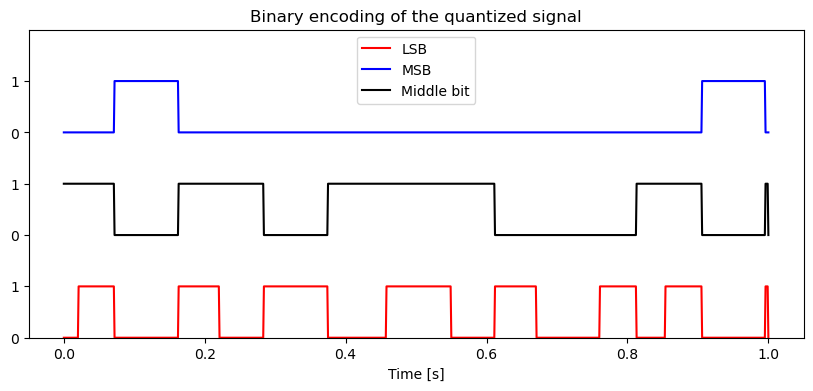

In [87]:
plt.plot(t_range, lsb_plot, 'red', label='LSB')
plt.plot(t_range, msb_plot+4, 'b', label='MSB')
plt.plot(t_range, middle_plot+2, 'black', label='Middle bit')
y_tick_labels = ['0', '1', '0', '1', '0', '1']
plt.yticks([0,1,2,3,4,5], y_tick_labels)
plt.legend()
plt.xlabel('Time [s]')
plt.ylim(0,6)
plt.title('Binary encoding of the quantized signal')



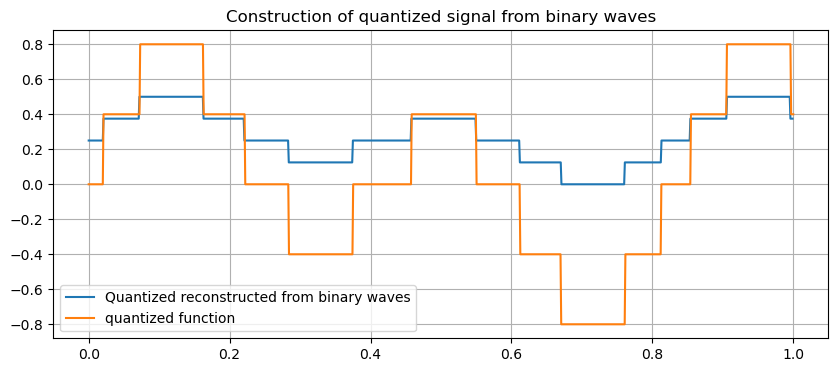

In [94]:
q_tot = 0
for i in range(1,np.shape(bit_waves)[0]+1):

    q_temp = 2**(-i)*bit_waves[i-1,:]
    q_tot = q_tot + q_temp

plt.plot(t_range[:-1], q_tot[:-1], label='Quantized reconstructed from binary waves')
plt.plot(x, q.quantize(test_func(x)), label='quantized function')
plt.title("Construction of quantized signal from binary waves")
plt.grid()
plt.legend()

In [89]:
q_tot[:-1]- q.quantize(test_func(x))

array([ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
        0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
        0.5 ,  0.5 ,  0.5 ,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,
        0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,
        0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,
        0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,
        0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,
        0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,  0.35,
        0.6 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,
        0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,
        0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,
        0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,
        0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,
        0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,  0.2 ,
        0.2 ,  0.2 ,

onda triangolare + skew rate 

## FIR filter design 

In [14]:
import filters_func 
from filters_func import perform  
 

In [15]:
filter_list = ['Moving average','Moving average_weight', 'Hamming window', 'Bartlet triangular', 'Butterworth', 'Low-pass']

### Moving average 
- the tap weights are all equal to 1/N
- each output sample is the average of the previous N input samples

In [96]:
from filters_func import FIR_class

# set filter taps and delay
K = 10
delay = 10
q_test = q.quantize(test_func(x))

f = FIR_class(K, delay)

MSE - Moving average filter =  0.07120027909905084
SNR - Moving average filter =  4.375050676215678


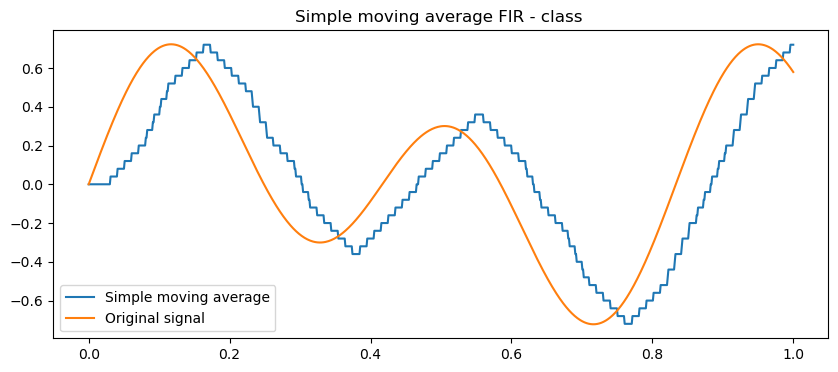

In [97]:
y_ma_class= f.movingAvg(x, q_test, corr=1)

plt.plot(x, y_ma_class, label='Simple moving average')
plt.plot(x, test_func(x),  label='Original signal')
#plt.plot(x[:-1], y_wma, label='Weighted moving average')
plt.title('Simple moving average FIR - class ')
plt.legend()

perform(y_ma_class, test_func(x), filter_list[0])

In [98]:
y_ma_class= f.movingAvg(x, q_test, corr=1)

plt.plot(x, y_ma_class, label='Simple moving average')
plt.plot(x, test_func(x),  label='Original signal')
#plt.plot(x[:-1], y_wma, label='Weighted moving average')
plt.title('Simple moving average FIR - class ')
plt.legend()

perform(y_ma_class, y_smp, filter_list[0])

### Hamming window filter


In [ ]:
y_ham_class = f.hamming(x,q_test, corr = 0.22)

plt.plot(x, y_ham_class, label = 'Hamming window filter')
plt.plot(x, test_func(x),  label='Original signal')
plt.title("Hamming window filter")
plt.legend()
plt.grid()

perform(y_ham_class, test_func(x), filter_list[2])

### Bartlet triangular filter

In [ ]:
y_bart_class = f.bartlet(x, q_test, corr=0.25)

In [ ]:
plt.plot(x[:-1], y_bart_class, label='Bartlett triangular')
plt.plot(x, test_func(x),  label='Original signal')
plt.title('Bartlet triangular FIR ')
plt.legend()

perform(y_bart_class, test_func(x)[:-1], filter_list[3])

### Butterworth filter

In [ ]:
from filters_func import butter_lowpass_filter, low_pass_fir

In [ ]:
fs_b = 500.0
T_b = 1/fs_b       # sample rate, Hz
cutoff = 2.5    # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs_b  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T_b * fs_b) # total number of samples

In [ ]:
y = butter_lowpass_filter(q_test, cutoff, fs_b, order, nyq)

plt.plot(x, test_func(x), label='original function')
plt.plot(x, y, label='filtered qunatized signal')
plt.title('Butterworth filter')
plt.legend()
plt.grid()
plt.show()
perform(y, test_func(x), filter_list[4])

### Simple low-pass

In [ ]:
y_lp = low_pass_fir(q_test, cutoff, 130, fs_b)

plt.plot(x, test_func(x), label='original function')
plt.plot(x, y_lp, label='Low pass filter')
plt.title('Low pass filter')
plt.legend()
plt.grid()

perform(y_lp, test_func(x), filter_list[5])